In [2]:
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
import librosa as lb
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp

In [4]:
# Function to extract STFT features from a speech signal
def stft_feature(signal, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return stft

y, sr = librosa.load(r"E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab 1\Recording (4).wav", sr=None)

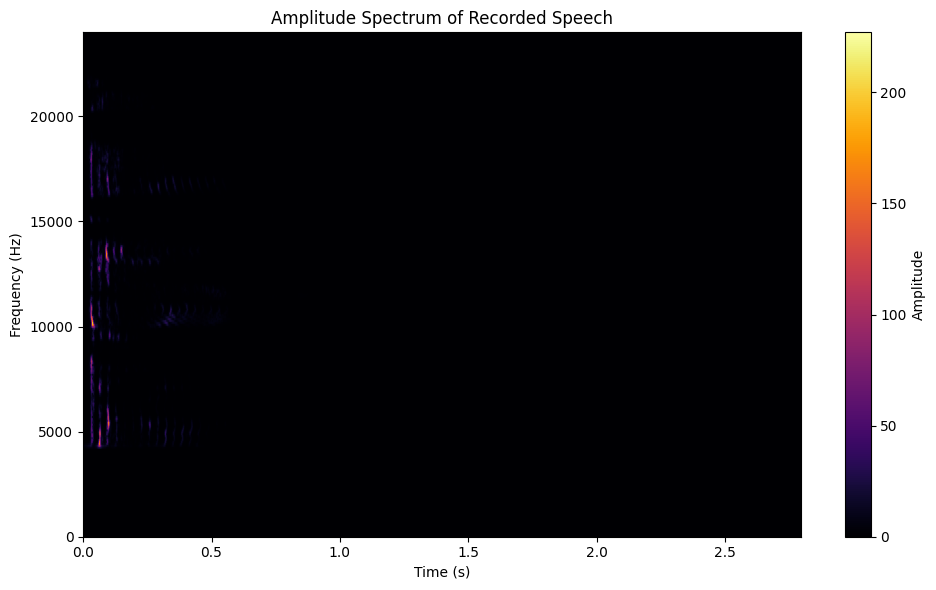

In [5]:
# Extract STFT features from the recorded speech
stft_features = stft_feature(y)

# Plot the amplitude spectrum of the recorded speech
plt.figure(figsize=(10,6))
plt.title('Amplitude Spectrum of Recorded Speech')
plt.imshow(stft_features.T, aspect='auto', origin='lower', cmap='inferno', extent=[0, len(y)/sr, 0, sr/2])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

In [6]:
n_components = 3 
n_iter = 100  

# Train the HMM model
model = hmm.GaussianHMM(n_components=n_components, n_iter=n_iter)
model.fit(stft_features.T)

# Perform classification
predicted_labels = model.predict(stft_features.T)  
predicted_class = np.argmax(np.bincount(predicted_labels)) 

print("Predicted class:", predicted_class)

Predicted class: 0


In [7]:
# Performing the classification task
predicted_labels = model.predict(stft_features.T)

# Printing the state sequences
print("State Sequence is:")
print()
print(predicted_labels)

State Sequence is:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


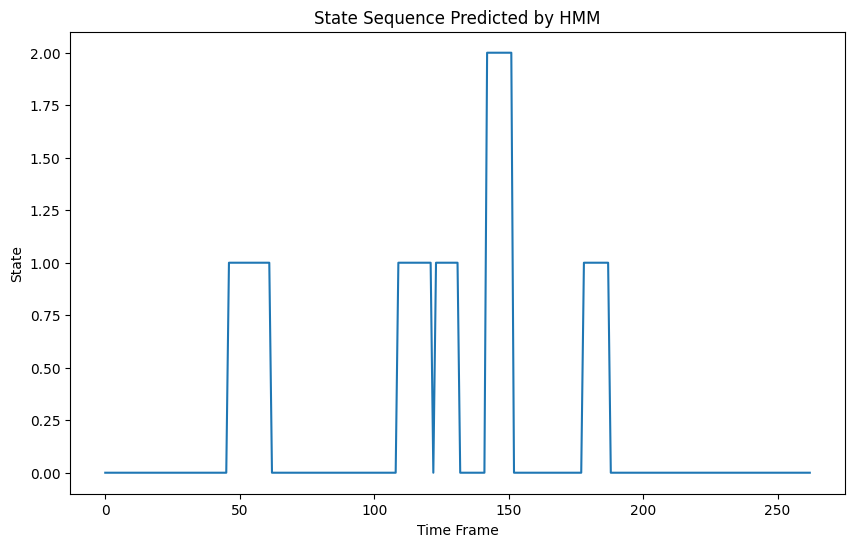

In [8]:
# Plotting the state sequence predicted by the HMM
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()

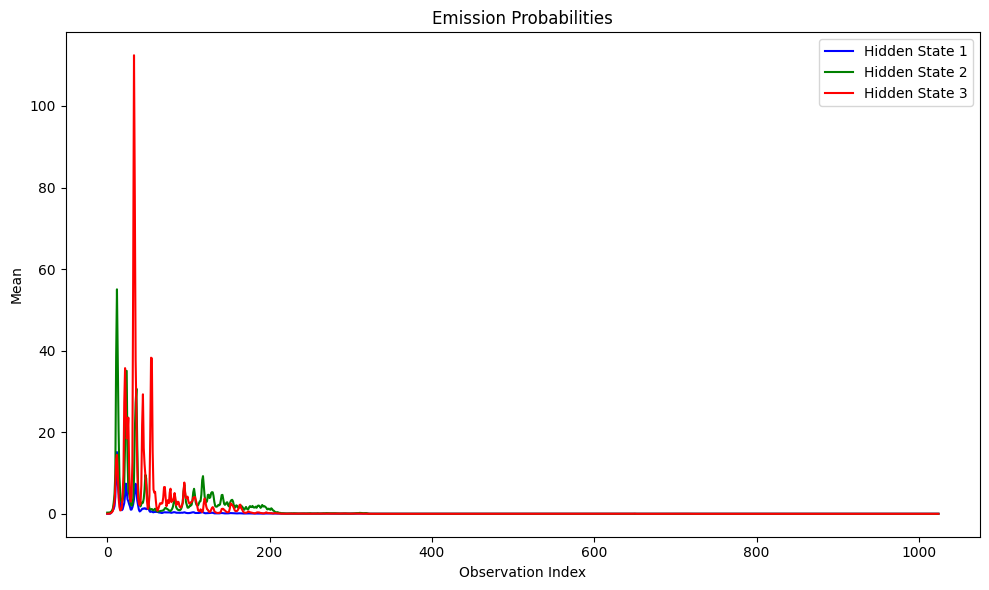

In [9]:
colors = ['blue', 'green', 'red'] 

# Plot the means of the Gaussian distributions (emission probabilities)
plt.figure(figsize=(10, 6))
plt.title('Emission Probabilities')
for i in range(model.n_components):
    plt.plot(model.means_[i], label=f'Hidden State {i+1}', color=colors[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()